In [1]:
import numpy as np

def distance(p1, p2):
    """Find the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

In [8]:
def majority_vote(votes):
    """
    To count the no. of times each vote appears.
    """
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

votes = [1,2,3,1,2,3,1,2,3,3,3,3]
vote_counts = majority_vote(votes)
print(vote_counts)
max_counts = max(vote_counts.values())
print(max_counts)

{1: 3, 2: 3, 3: 6}
6


In [4]:
max(vote_counts)

3

In [5]:
max(vote_counts.keys())

3

In [6]:
max(vote_counts.values())

6

In [12]:
winners = []
max_count = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)

print(winners)

[3]


In [13]:
import random

def majority_vote(votes):
    """
    To count the no. of times each vote appears.
    If there is more than 1 winner, a randomly-selected winner is picked.
    """
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1          
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)

    return random.choice(winners)

In [19]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
majority_vote(votes)

2

In [20]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return the most common element in votes.
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [21]:
majority_vote_short(votes)

array([2.])

In [34]:
def find_nearest_neighbors(P, points, k=5):
    """Find the k nearest neighbors of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance between point P and every other point
        distances[i] = distance(P, points[i])
    #sort distances and return those k points that are nearest to point P
    #np.argsort: it sorts an array according to a single argument and returns the sorted indices
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(P, points, outcomes, k=5):
    """Predict the classification of point P based on the 'points' array's outcomes, and based on their distances"""
    #find k nearest neighbors
    ind = find_nearest_neighbors(P, points, k)
    #predict the class of point P based on majority vote
    return majority_vote(outcomes[ind])


#To assign classifications to the 9 points in 'points' array
outcomes = np.array([0,0,0,0,1,1,1,1,1])

#To create a vector
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

#this function will classify point P based on the 'outcomes' and the distances of P and the 'points' array
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)
#To create a point P
#P = np.array([2.5, 2])

#ind = find_nearest_neighbors(P, points, 3); print(points[ind])

#import matplotlib.pyplot as plt
#plt.plot(points[:,0], points[:,1], "ro")
#plt.plot(P[0],P[1], "bo")
#plt.axis([0.5, 3.5, 0.5, 3.5])
#plt.show()

1

In [37]:
points.shape

(9, 2)

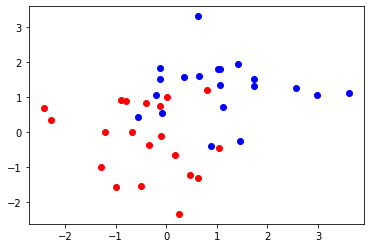

In [49]:
#GENERATING SYTHETIC DATA:
    #Benefit: You know exactly how the data were generated so you know what to expect when testing code.

#Generate synthetic data from class 0
ss.norm(0,1).rvs((5,2))
#Generate synthetic data from class 1
ss.norm(1,1).rvs((5,2))

def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distributions."""
    #To concatenate 2 numpy arrays along the rows/ row-wise (axis=0)
    #np.concatenate: takes in a tuple of np.arrays and joins them lengthwise along the specified axis
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    #Generate the 'outcomes' vector
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 20
(points, outcomes) = generate_synth_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivariate.pdf")

In [51]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid."""
    #limits is a tuple
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    #np.meshgrid takes an array/matrix of x-values and an array/matrix of y-values (do not have to be the same length) and generate into a grid of coordinates 
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    #enumerate returns a list of tuples
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            #this is in [j,i] because we want j to be assigned to the rows of the array, and i to be the columns pf the array
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)

In [54]:
seasons = ["spring", "summer", "fall", "winter"]
#enumerate returns a list of tuples
print(list(enumerate(seasons)))

for ind, season in enumerate(seasons):
    print(ind, season)

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]
0 spring
1 summer
2 fall
3 winter


In [56]:
(predictors, outcomes) = generate_synth_data()
print(predictors.shape)
print(outcomes.shape)

(100, 2)
(100,)


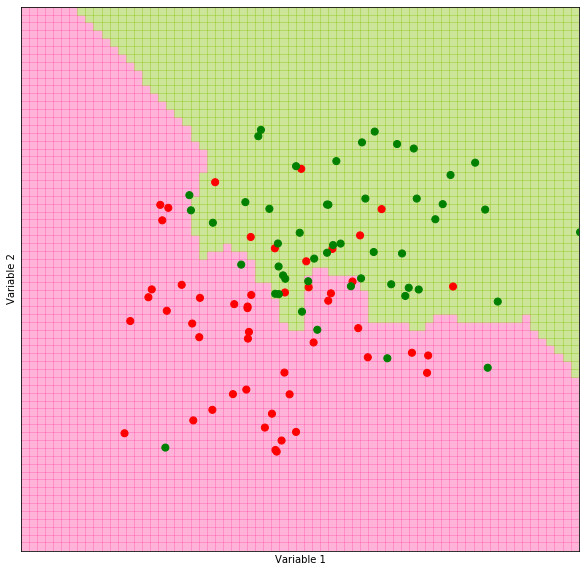

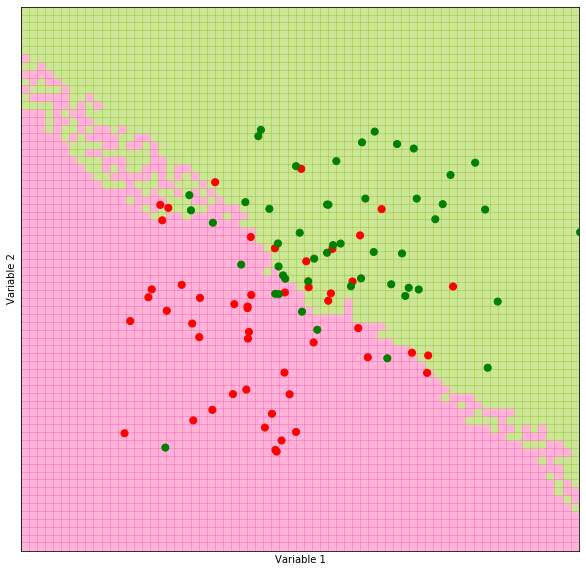

In [60]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    
(predictors, outcomes) = generate_synth_data()

#Value of k affects the smoothness of the decision boundary
#k=50 has a smoother decision boundary than k=5, which has a more complicated decision boundary
k=5; filename="knn_synth_5.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

k=50; filename="knn_synth_50.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

#bias variance tradeoff: a phenomenon that uses a k-value that is too small or too large
#need to use intermediate values of k
#k value has to work on future data which we have not seen - it is not about how well it works on the training data set
#in the above example, k=5 is a reasonable choice

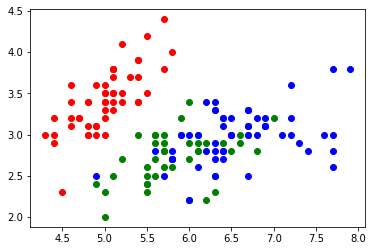

In [67]:
from sklearn import datasets
#"iris" data is a classic data that has 150 observations of iris flowers (50 observations for each species, 3 species in total) with 4 covariates:
#sepal length, sepal width, petal length, petal width
iris = datasets.load_iris()
iris["data"]

predictors = iris.data[:, 0:2]
outcomes = iris.target

#"outcomes" = the 3 different flowers species (the class which each obs is classified) which we are setting
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

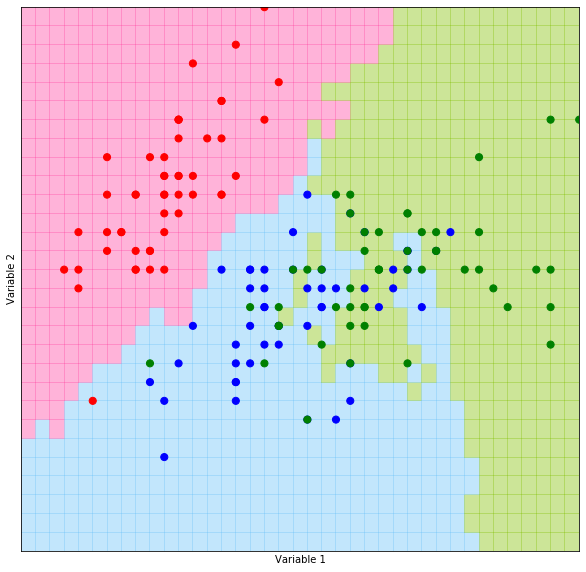

In [68]:
k=5; filename="iris_grid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

print(sk_predictions.shape)
#This is the predictions provided by the SciKitLearn algorithm
print(sk_predictions[0:10])

(150,)
[0 0 0 0 0 0 0 0 0 0]


In [77]:
#This is the predictions from our home-made "knn_predict" function
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [78]:
#How often does the SciKitLearn prediction agrees with our home-made prediction?
#a boolean array of True/ False is generated
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [80]:
#This generates the %value of how much the SciKitLearn algo agrees with our home-made algo
print(np.mean(sk_predictions == my_predictions) * 100)

96.0


In [81]:
#SciKitLearn agrees with the Outcomes 83% of the time
print(np.mean(sk_predictions == outcomes) * 100)
#Our home-made Classifier agrees with the Outcomes 85% of the time - which is somewhat better
print(np.mean(my_predictions == outcomes) * 100)

83.33333333333334
84.66666666666667
